In [136]:
!pip install gensim

In [132]:
!pip install fasttext

  Using cached fasttext-0.9.2.tar.gz (68 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached pybind11-2.10.1-py3-none-any.whl (216 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp39-cp39-win_amd64.whl size=230030 sha256=53a4ebb00d40819bd9eb1afef53002ea21201a58a27156cefdbf44ca95315e16
  Stored in directory: c:\users\pavel\appdata\local\pip\cache\wheels\64\57\bc\1741406019061d5664914b070bd3e71f6244648732bc96109e
Successfully built fasttext


In [2]:
!pip install pymorphy2

  Using cached pymorphy2-0.9.1-py3-none-any.whl (55 kB)
  Using cached docopt-0.6.2.tar.gz (25 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached pymorphy2_dicts_ru-2.4.417127.4579844-py2.py3-none-any.whl (8.2 MB)
  Using cached DAWG_Python-0.7.2-py2.py3-none-any.whl (11 kB)
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=c53a1927330722282103f2934993a264d389fc299b9279c16d8531f850e20daf
  Stored in directory: c:\users\pavel\appdata\local\pip\cache\wheels\70\4a\46\1309fc853b8d395e60bafaf1b6df7845bdd82c95fd59dd8d2b
Successfully built docopt


In [1296]:
!pip install --user deeppavlov

  Using cached deeppavlov-1.0.1-py3-none-any.whl (441 kB)
  Using cached fastapi-0.77.1-py3-none-any.whl (54 kB)
  Using cached aio_pika-6.8.2-py3-none-any.whl (42 kB)
  Using cached aiormq-3.3.1-py3-none-any.whl (28 kB)


In [1298]:
!pip install fastText

     ---------------------------------------- 68.8/68.8 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for fastText: filename=fasttext-0.9.2-cp38-cp38-win_amd64.whl size=225373 sha256=66c5a06af80950738f50bbf577ef0e280ebf49bff4d54c24a87cd1333ec1f5d1
  Stored in directory: c:\users\pavel\appdata\local\pip\cache\wheels\93\61\2a\c54711a91c418ba06ba195b1d78ff24fcaad8592f2a694ac94
Successfully built fastText


# Кластеризация на текстах

In [1]:
import re
import ssl
from urllib import request

import numpy as np
import pandas as pd
from gensim.models import Word2Vec

from sklearn.feature_extraction.text import TfidfVectorizer
import pymorphy2

from collections import Counter

import random

import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances

from sklearn.metrics import pairwise_distances
# from kneed import KneeLocator
from scipy.spatial.distance import cdist

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import completeness_score

from sklearn.metrics.pairwise import euclidean_distances

import os
import fasttext
import fasttext.util
import gensim

In [21]:
import gensim.downloader as download_api
russian_model = download_api.load('word2vec-ruscorpora-300')

In [2]:
# Прочитаем отдельно данные, которые не будем изменять,
# чтобы по интересующим нам индексам проверять изменения с изменяемым данными

data_0 = pd.read_csv('data_split_into_classes.csv')

In [3]:
# Например, можем найти записи с интересующим нас объектом

search_object = 'комплекс'
search_index = [i for i in range(len(data_0.title)) if search_object.lower() in data_0.title[i].lower()]
data_0.iloc[search_index]

,item_id,image_id,title
140,353654750414,3008584388,Многофункциональный спортивный комплекс AGS 2000
143,815478750262,8419543050,Силовой комплекс Weider 2980 X
152,341297250382,2908753720,Комплексный тренажёр
192,1123474001361,11845212740,"Тренажёр Sport Elite, силовой комплекс (турник..."
352,671189750076,5152094484,Тренажер-Спортивный комплекс
416,225453000147,2032753679,"Домашний спортивный комплекс ""Жирафик А"""
417,228857000361,2053340840,Новый тренажерный комплекс
510,95247500013,1345879263,Силовой комплекс на свободных весах
523,85685500183,1297437055,Силовой комплекс Flexter
628,272974500345,2380595258,Комплексный тренажор


In [2]:
# От безисходности переименовал все товары, в названии которых содержались англ. слова

def hand_markup(data):
    data.at[140, 'title'] = "спортивный комплекс"
    data.at[143, 'title'] = "силовой комплекс"
    data.at[152, 'title'] = "комплексный тренажер"
    data.at[192, 'title'] = "силовой комплекс"
    data.at[352, 'title'] = "силовой комплекс"
    data.at[416, 'title'] = "спортивный комплекс"
    data.at[417, 'title'] = "тренажерный комплекс"
    data.at[510, 'title'] = "силовой комплекс"
    data.at[523, 'title'] = "силовой комплекс"
    data.at[628, 'title'] = "тренажерный комплекс"
    data.at[661, 'title'] = "тренажерный комплекс"
    data.at[843, 'title'] = "тренажерный комплекс"
    data.at[848, 'title'] = "силовой комплекс"
    data.at[1011, 'title'] = "тренажер пресс"
    data.at[1220, 'title'] = "турник комплекс"
    data.at[1220, 'title'] = "турник комплекс"
    data.at[1373, 'title'] = "силовой комплекс"
    data.at[1495, 'title'] = "силовой комплекс"
    data.at[1695, 'title'] = "силовой комплекс"
    data.at[1860, 'title'] = "спортивный комплекс"
    data.at[2131, 'title'] = "силовой комплекс"
    data.at[2188, 'title'] = "силовой комплекс"
    data.at[2189, 'title'] = "спортивный комплекс"
    data.at[2216, 'title'] = "силовой комплекс"
    data.at[2452, 'title'] = "силовой комплекс"
    data.at[4, 'title'] = "силовой тренажер"
    data.at[198, 'title'] = "эллиптический эргометр"
    data.at[199, 'title'] = "велотренажер"
    data.at[241, 'title'] = "тренажер эллиптический"
    data.at[282, 'title'] = "тренажер"
    data.at[406, 'title'] = "силовой тренажер"
    data.at[422, 'title'] = "эллиптический тренажер"
    data.at[432, 'title'] = "велотренажер"
    data.at[457, 'title'] = "силовой тренажер"
    data.at[541, 'title'] = "тренажер"
    data.at[566, 'title'] = "эллиптический тренажер"
    data.at[638, 'title'] = "силовой тренажер"
    data.at[668, 'title'] = "эллиптический тренажер"
    data.at[693, 'title'] = "беговая дорожка"
    data.at[700, 'title'] = "эллиптический тренажер"
    data.at[857, 'title'] = "велотренажер"
    data.at[890, 'title'] = "тренажер"
    data.at[894, 'title'] = "эллиптический тренажер"
    data.at[999, 'title'] = "эллиптический тренажер"
    data.at[1065, 'title'] = "эллиптический тренажер"
    data.at[1088, 'title'] = "беговая дорожка"
    data.at[1125, 'title'] = "силовой тренажер"
    data.at[1128, 'title'] = "маска"
    data.at[1143, 'title'] = "эллиптический тренажер"
    data.at[1168, 'title'] = "силовой комплекс"
    data.at[1237, 'title'] = "тренажер"
    data.at[1243, 'title'] = "эллиптический тренажер"
    data.at[1303, 'title'] = "силовой комплекс"
    data.at[1306, 'title'] = "беговая дорожка"
    data.at[1422, 'title'] = "эллиптический тренажер"
    data.at[1461, 'title'] = "тренажер"
    data.at[1507, 'title'] = "велотренажер"
    data.at[1511, 'title'] = "тренажер"
    data.at[1548, 'title'] = "беговая дорожка"
    data.at[1568, 'title'] = "эллиптический тренажер"
    data.at[1760, 'title'] = "тренажер нога"
    data.at[1813, 'title'] = "эллиптический тренажер"
    data.at[1908, 'title'] = "мини степпер"
    data.at[1935, 'title'] = "маска"
    data.at[1996, 'title'] = "эллиптический тренажер"
    data.at[2046, 'title'] = "беговая дорожка"
    data.at[2056, 'title'] = "тренажер"
    data.at[2138, 'title'] = "силовой тренажер"
    data.at[2150, 'title'] = "степпер"
    data.at[2280, 'title'] = "эллиптический тренажер"
    data.at[2293, 'title'] = "тренажер"
    data.at[2403, 'title'] = "маска"
    data.at[2436, 'title'] = "турник брусья"
    data.at[2451, 'title'] = "велотренажер"
   
    return data

In [3]:
# Предобработка

def preprocessing(text):
    text_copy = text
    """Делаем предобработку.
    
    - приводим к нижнему регистру
    - удаляем пунктуацию и цифры
    - удаляем английские слова: не имеют большой значимости для данной задачи
    :return: строка обработанного текста
    """
    if 'mi band' in text.lower() or 'часы' in text.lower():
        return ' '.join(['браслет'])
    
    text = re.sub(r'[^А-я]', ' ', text.lower()).split()
                
    if not text:
        return ' '.join(['тренажер'])
    
    return ' '.join(text)


# Также функция беисходности, где вручную просто исправлялись ошибки
def preprocessing2(text):
    text_copy = text
    
    text = [word for word in text.split() if word not in stop_words]
    text = [word.replace('ё', 'е') if 'ё' in word else word for word in text]
    text = ['тренажер' if word == 'тренаж' or word == 'тренажёр' or word == 'тренажор' or word == 'вибротренажер'\
            or word == 'треножор' or word == 'кросстренер' or word == 'тренежер' or word == 'гурить'\
            or word == 'тренажена' else word for word in text]
    text = ['велотренажер' if word == 'велотренаж' or word == 'байк' or word == 'спин' or word == 'велотренажёр'\
            or word == 'велотренажор' or word == 'велоэллипсоид' or word == 'велотреножор' or word == 'веллотренаж'\
            or word == 'веллотренаж' or word == 'велотренжер' or word == 'веллотренаж' or word == 'веллосипед'\
            or word == 'елотренажер' or word == 'ведотренажер' else word for word in text]
    
    text = ['гиря' if word == 'неваляшка ссср' else word for word in text]
    text = ['беговой' if word == 'бегов' else word for word in text]
    text = ['диск' if word == 'блин' else word for word in text]
    text = ['степпер' if word == 'министеппер' else word for word in text]
    text = ['тренажер эллиптический' if word == 'элипсойда' or word == 'элипсоид' or word == 'элептический'\
            or word == 'эллипс' or word == 'эллипсоид' or word == 'элитсоид' or word == 'эллипсойда'\
            or word == 'элипа' or word == 'велоэллипсоид' else word for word in text]
    
    text = ['степпер' if word == 'кардиотвистер' else word for word in text]
    text = ['беговая дорожка' if word == 'министадион' else word for word in text]
    text = ['турник' if word == 'турниквинстаграмма' else word for word in text]
    text = ['гантель' if word == 'гатнель' or word == 'гантела' else word for word in text]
    
    text = ' '.join(text).split()
    
    text = list(set(text))
    
    text.sort()
    
    if len(text) == 0:
        return text_copy

    return ' '.join(text)


# Приведение слова к нормальной форме
def norm(x):
    morph = pymorphy2.MorphAnalyzer()
    p = morph.parse(x)[0]
    return p.normal_form


# Приведение заголовка к нормальный форме
def norm_text(text):
    text_list = []
    for x in text.split():
        text_list.append(norm_dict[x])
    return ' '.join(text_list)


# Оставляем только слова из словаря word_crop, 
# word_crop - обрезанный словарь с наиболее популярными словами
def word_default(text):
    text_list = []
    for word in text.split():
        if word in word_crop:
            text_list.append(word)
    text_list.sort()
    if not text_list:
        return text
    return ' '.join(text_list)


# Получение словаря с со словами из заголовков, но в нормальной форме
def get_norm_dict(data):
    text = ' '.join([title for title in data.title]).split()
    text_set = list(set(text))
    morph = pymorphy2.MorphAnalyzer()
    norm_dict = {}        
    for word in text_set:
            norm_dict[word] = morph.parse(word)[0].normal_form
    
    return norm_dict


# Сортируем словарь, где значние это кол-во появлений слова в заголовке,
# таким образом, мы сможем отсчеть наименее популярные слова в дальнейшем
def sorted_dict_(dict1):
    sorted_tuples = sorted(dict1.items(), key=lambda item: item[1], reverse=True)
    sorted_dict = {k: v for k, v in sorted_tuples}

    return sorted_dict

In [16]:
# Также в ручном режиме был сформирован словарь стоп-слов
stop_words = list(pd.read_csv('stop_words.txt', names=['word']).word)

# Читаем данные и проводим всю предобработку
data = pd.read_csv('data_split_into_classes.csv')
data = hand_markup(data)
data['title'] = data['title'].apply(preprocessing)
norm_dict = get_norm_dict(data)
data['title'] = data['title'].apply(norm_text)

# Подсчитываем слова
word_counter = Counter(' '.join([title for title in data.title]).split())

# сортируем по популярности
word_dict_ = sorted_dict_(dict(word_counter))

# берем только те, которые встречались больше одного раза 
word_crop = [k for k, v in word_dict_.items() if v > 1]

# Приводим слова к нормельной форме и удаляем союзы, предлоги и т. д.
parts_of_speech = ['VERB', 'PRCL', 'INTJ', 'CONJ', 'NPRO', 'INFN', 'NUMR', 'PREP', 'ADVB']
morph = pymorphy2.MorphAnalyzer()
word_crop = [word for word in word_crop if morph.parse(word)[0].tag.POS not in parts_of_speech and len(word) > 2]

# Слово блин было посчитано междометием и удалено, поэтому возвращаем его обратно
word_crop.append('блин')

# Обрабатываем заголовки на основе полученного словаря
data['title'] = data['title'].apply(word_default)
data['title'] = data['title'].apply(preprocessing2)

In [101]:
# TF-IDF
vectorizer = TfidfVectorizer()
tf_corpus = [' '.join(text) for text in w2v_corpus]
w2v_embeddings = vectorizer.fit_transform(tf_corpus)

In [17]:
# Обучение Word2Vec на основе имеющихся очищенных заголовков
w2v_corpus = [x.split() for x in data['title']]

# При обучении на основе склеенного из заголовков корпуса параметр window не имеет смысла
w2v_model = Word2Vec(min_count=1, vector_size=300, hs=0, window=3, seed=0)
w2v_model.build_vocab(w2v_corpus)
w2v_model.train(w2v_corpus, total_examples=w2v_model.corpus_count, epochs=w2v_model.epochs) 

# получение векторов заголовков из векторов слов
w2v_embeddings = []
for title_words in w2v_corpus:
    # не забываем, что некоторые слова могут не быть в словаре Word2Vec из-за выставленного min_count
    title_word_embs = [
        w2v_model.wv[word] 
        for word in title_words 
        if word in w2v_model.wv.key_to_index
    ]
    title_emb = sum(title_word_embs) / len(title_word_embs)
    w2v_embeddings.append(title_emb)
w2v_embeddings = np.vstack(w2v_embeddings)

In [167]:
# Пробуем обучить fasttext на корпусе, закомментируем, чтобы случайно не запустить, обучение происходит довольно долго

# model = gensim.models.KeyedVectors.load_word2vec_format("cc.ru.300.vec")

In [170]:
# получение векторов заголовков из векторов слов
fst_embeddings = []

fst_corpus = [x.split() for x in data['title']]

for title_words in fst_corpus:
    # не забываем, что некоторые слова могут не быть в словаре Word2Vec из-за выставленного min_count
    title_word_embs = [
        model.get_vector(word) 
        for word in title_words 
        if word in model.key_to_index
    ]
    if len(title_word_embs) == 0:
        print(title_words)
#     title_emb = sum(title_word_embs) / len(title_word_embs)
#     fst_embeddings.append(title_emb)
# fst_embeddings = np.vstack(fst_embeddings)

['тренажер']
['тренажер']
['тренажер']
['тренажер']
['тренажер']
['тренажер']
['степпер']
['тренажер']
['тренажер']
['тренажер']
['тренажер']
['кардиостеппер', 'степпер', 'тренажер']
['тренажер']
['тренажер']
['тренажер']
['тренажер']
['орбитрек']
['вибромассажер']
['тренажер']
['тренажер']
['степпер', 'тренажер']
['степпер']
['степпер', 'тренажер']
['степпер']
['тренажер']
['вибромассажер']
['тренажер']
['вибромассажер']
['тренажер']
['степпер']
['тренажер']
['степпер', 'тренажер']
['кардиотренажер']
['тренажер']
['тренажер']
['тренажер']
['тренажер']
['вибромассажер']
['тренажер']
['тренажер']
['тренажер']
['тренажер']
['тренажер']
['тренажер']
['степпер']
['степпер']
['степпер']
['тренажер']
['степпер', 'тренажер']
['степпер', 'тренажер']
['тренажер']
['тренажер']
['тренажер']
['тренажер']
['тренажер']
['вибромассажер']
['степпер', 'тренажер']
['степпер', 'тренажер']
['мультистанция', 'тренажер']
['степпер']
['мультистанция']
['тренажер']
['тренажер']
['тренажер']
['степпер', 'трена

In [ ]:
# Так как ниже во всех алгоритмах участвуют вектора с названием w2v, то легче было переименовать
w2v_embeddings = fst_embeddings.copy()

In [19]:
# Сюда можем подставлять кол-во предполагаемых кластеров и смотреть насколько чистое получилось разбиение
kmeans = KMeans(n_clusters=17)
kmeans.fit(w2v_embeddings)

top = 30
clusters = kmeans.labels_
dist_to_centers = euclidean_distances(kmeans.cluster_centers_, w2v_embeddings)
top_most_similar = np.argsort(dist_to_centers)[:, :top]

for clt in np.unique(clusters):
    ids = top_most_similar[clt]
    most_similar_titles = '\n'.join(data.iloc[ids]['title'])
    print(f'Cluster {clt}:\n{most_similar_titles}')

Cluster 0:
гантель
гантель
гантель
гантель
гантель
гантель
гантель
гантель
гантель
гантель
гантель
гантель
гантель
гантель
гантель
гантель
гантель
гантель
гантель
гантель
гантель
гантель
гантель
гантель
гантель
гантель
гантель
гантель
гантель
гантель
Cluster 1:
велотренажер
велотренажер
велотренажер
велотренажер
велотренажер
велотренажер
велотренажер
велотренажер
велотренажер
велотренажер
велотренажер
велотренажер
велотренажер
велотренажер
велотренажер
велотренажер
велотренажер
велотренажер
велотренажер
велотренажер
велотренажер
велотренажер
велотренажер
велотренажер
велотренажер
велотренажер
велотренажер
велотренажер
велотренажер
велотренажер
Cluster 2:
беговой дорожка
беговой дорожка
беговой дорожка
беговой дорожка
беговой дорожка
беговой дорожка
беговой дорожка
беговой дорожка
беговой дорожка
беговой дорожка
беговой дорожка
беговой дорожка
беговой дорожка
беговой дорожка
беговой дорожка
беговой дорожка
беговой дорожка
беговой дорожка
беговой дорожка
беговой дорожка
беговой дорожка
б

In [20]:
# Считаем силуэт и выводим результат
score = silhouette_score(w2v_embeddings, kmeans.predict(w2v_embeddings))
print('silhouette_score =', score)

pd.DataFrame(kmeans.labels_).to_csv('solution_k_means.csv', header=['cluster'], index=False)

silhouette_score = 0.65203243


k = 2 score = 0.26702
k = 3 score = 0.30696
k = 4 score = 0.39087
k = 5 score = 0.442
k = 6 score = 0.5203
k = 7 score = 0.53899
k = 8 score = 0.55928
k = 9 score = 0.56651
k = 10 score = 0.57768
k = 11 score = 0.59052
k = 12 score = 0.6111
k = 13 score = 0.62151
k = 14 score = 0.62648
k = 15 score = 0.64641
k = 16 score = 0.64722
k = 17 score = 0.65467
k = 18 score = 0.65873
k = 19 score = 0.68148
k = 20 score = 0.66766
k = 21 score = 0.68444
k = 22 score = 0.70544
k = 23 score = 0.71037
k = 24 score = 0.71537
k = 25 score = 0.71675
k = 26 score = 0.7244
k = 27 score = 0.73228
k = 28 score = 0.73357
k = 29 score = 0.74009
k = 30 score = 0.74007
k = 31 score = 0.74214
k = 32 score = 0.74637
k = 33 score = 0.75243
k = 34 score = 0.75514


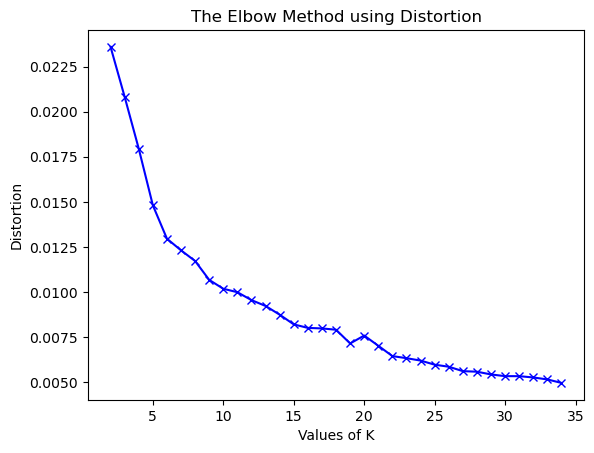

In [8]:
# Считаем силует в зависимости от кол-ва кластеров

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(2, 35)
X = w2v_embeddings.copy()
for k in K:

    kmeanModel = KMeans(n_clusters=k).fit(X)

    distortions.append(sum(np.min(euclidean_distances(X, kmeanModel.cluster_centers_), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(euclidean_distances(X, kmeanModel.cluster_centers_), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_
    
    print('k =', k, 'score =', round(silhouette_score(w2v_embeddings, kmeanModel.predict(w2v_embeddings)), 5))
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

k = 2 score = 0.19293898
k = 3 score = 0.19210012
k = 4 score = 0.32871383
k = 5 score = 0.35188836
k = 6 score = 0.3588631
k = 7 score = 0.35578346
k = 8 score = 0.3460929
k = 9 score = 0.38007024
k = 10 score = 0.53389454
k = 11 score = 0.4686304
k = 12 score = 0.5374147
k = 13 score = 0.52562183
k = 14 score = 0.55263984
k = 15 score = 0.53077435
k = 16 score = 0.58571637
k = 17 score = 0.5931164
k = 18 score = 0.61731386
k = 19 score = 0.49790895
k = 20 score = 0.56757027
k = 21 score = 0.6140608
k = 22 score = 0.5994748
k = 23 score = 0.628346
k = 24 score = 0.64104456
k = 25 score = 0.58894664
k = 26 score = 0.64125556
k = 27 score = 0.5908405
k = 28 score = 0.6381977
k = 29 score = 0.67301536
k = 30 score = 0.6557008
k = 31 score = 0.67863446
k = 32 score = 0.6621564
k = 33 score = 0.6121867
k = 34 score = 0.6407067


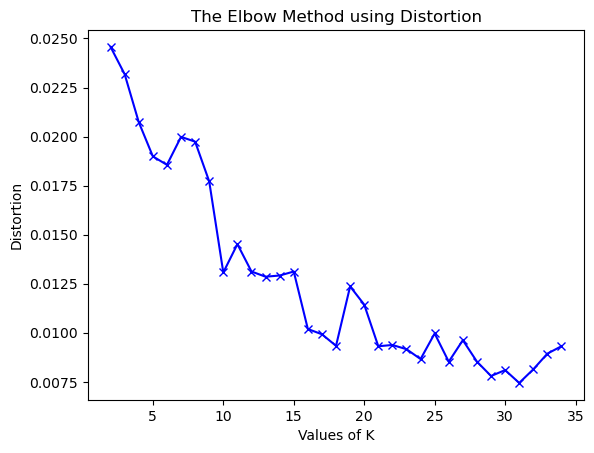

In [21]:
# BisectingKMeans появляется в самых поздних версиях sklearn

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(2, 35)
X = w2v_embeddings.copy()  
for k in K:
    # Building and fitting the model
    kmeanModel = BisectingKMeans(n_clusters=k).fit(X)
#     kmeanModel.fit(X)
  
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_
    
    print('k =', k, 'score =', silhouette_score(w2v_embeddings, kmeanModel.predict(w2v_embeddings)))
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

C:\Users\pavel\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\pavel\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


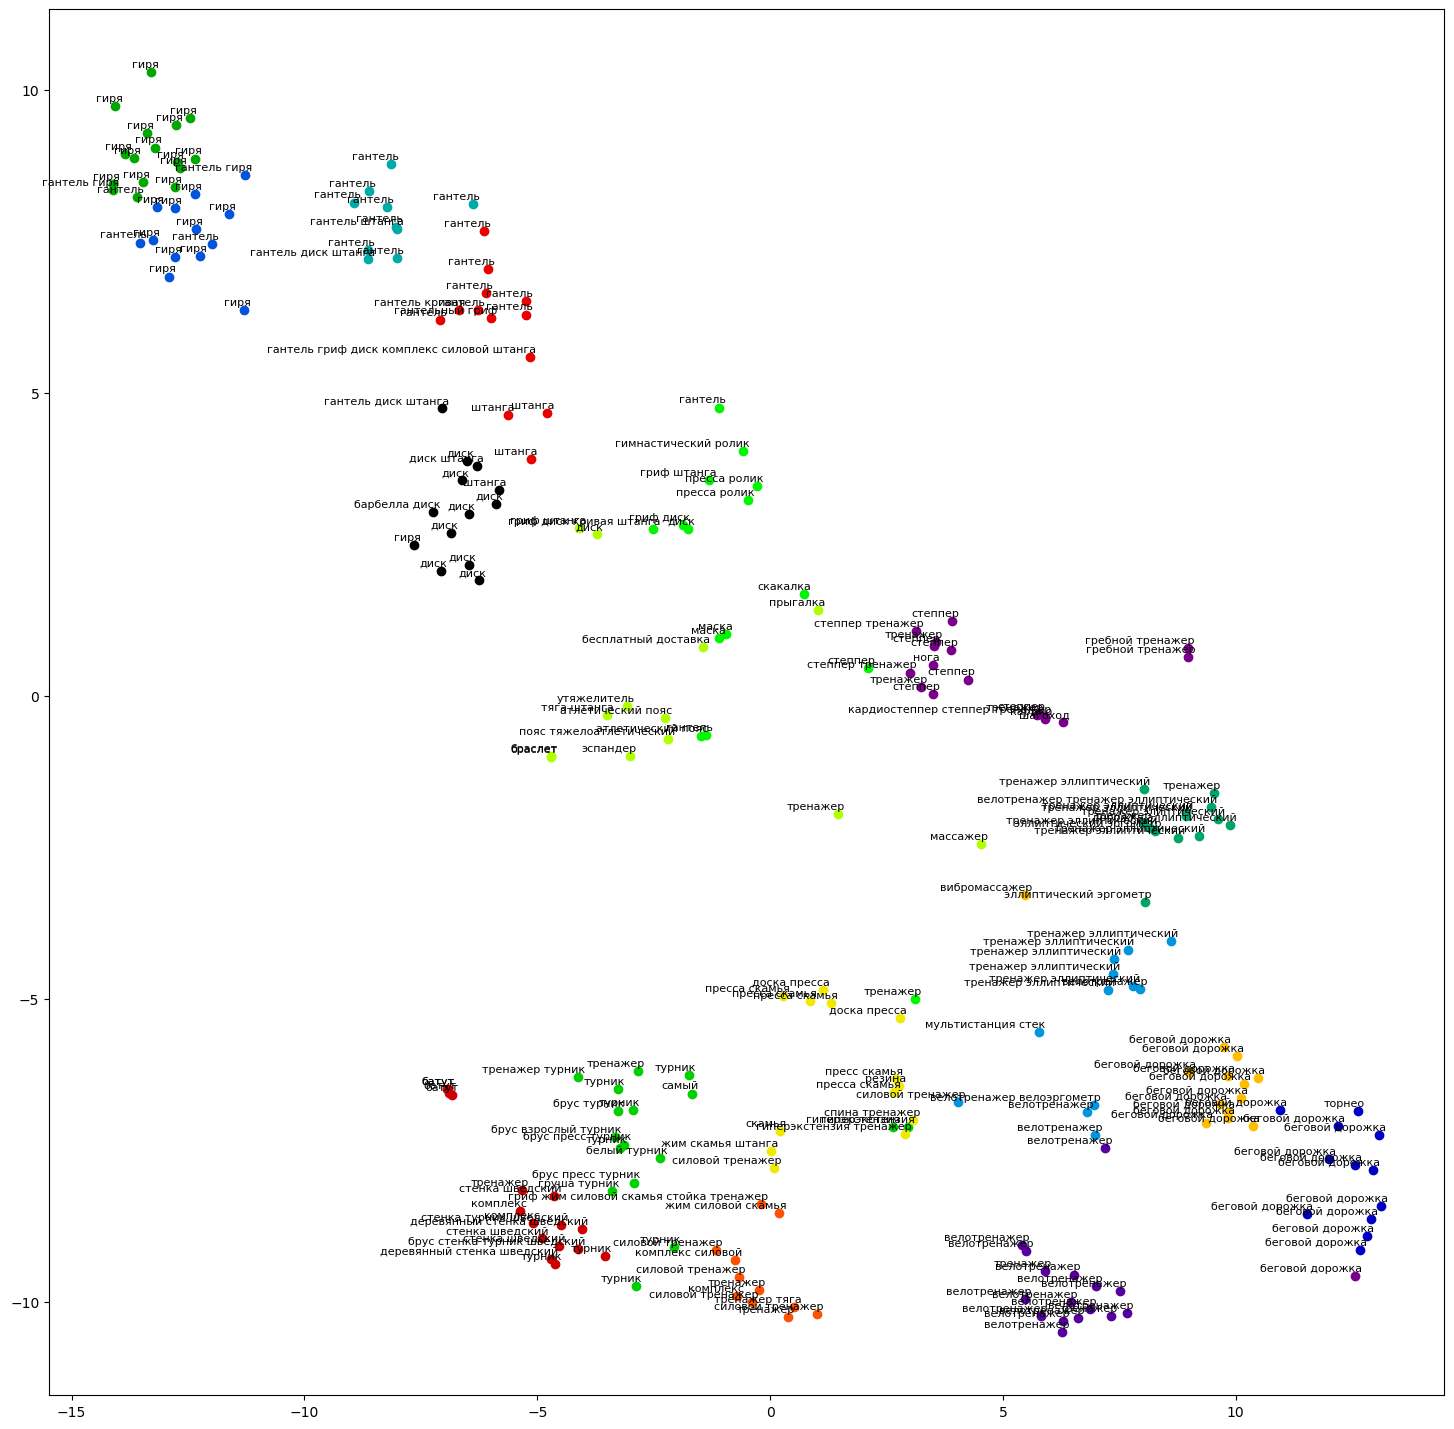

In [12]:
# для каждого кластера сэмплируем не более 20 точек для ускорения TSNE и наглядности картинки
sample_i = []
for clt in np.unique(clusters):
    cluster_mask = clusters == clt
    sample_i += random.sample(list(np.where(cluster_mask)[0]), min(20, cluster_mask.sum()))

# берем слайс по sample_i
sample_embeddings = w2v_embeddings[sample_i]
sample_clusters = clusters[sample_i].reshape(-1, 1)
sample_texts = data['title'].values[sample_i]

# обучаем и применяем TSNE
tsne_model = TSNE(perplexity=50, metric='cosine', init='pca', n_iter=2500, random_state=17)
reduced_embeddings = tsne_model.fit_transform(sample_embeddings)

not_annotate_thr=0.3
plt.figure(figsize=(18, 18)) 
colors = cm.nipy_spectral(sample_clusters.astype(float) / len(np.unique(sample_clusters)))
for i, (x, y) in enumerate(reduced_embeddings):
    if np.random.rand() > not_annotate_thr:
        plt.scatter(x, y, c=colors[i])
        plt.annotate(sample_texts[i],
                     xy=(x, y),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom', 
                     size=8)
plt.show()

In [14]:
# DBSCAN
score_max = 0
for eps in np.linspace(0.005, 0.02, 15):
    for ms in range(5, 100, 5):
        clustering = DBSCAN(eps=eps, min_samples=ms, metric='euclidean', n_jobs=-1)
        clusters = clustering.fit_predict(w2v_embeddings)
        count_clusters = len(list(set(clustering.labels_)))
        
        # С одним кластером силуэт не считается, поэтому заблочим этот вариант
        if  count_clusters != 1:
            score = silhouette_score(w2v_embeddings, clusters)
            
            # Здесь можно выставлять только интересующее нас кол-во кластером и точность
            # Или выводить только при преодолении максимальной точности
            if score > 0.15 and count_clusters < 20:
                score_max = score
                print(f'eps = {eps:0.3f}, ms = {ms}, count clusters = {count_clusters}: {score:0.4f}')


KeyboardInterrupt: 

In [711]:
# Подставляем лучшее значение из предыдущей ячейки
clustering = DBSCAN(eps=0.010, min_samples=25, metric='euclidean', n_jobs=-1)
clusters = clustering.fit_predict(w2v_embeddings)

pd.DataFrame(clustering.labels_).to_csv('solution.csv', header=['cluster'], index=False)

In [13]:
# Пробуем все возможный методы кластеризации

from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.mixture import GaussianMixture
from sklearn.cluster import BisectingKMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import OPTICS
from sklearn.cluster import AgglomerativeClustering

In [124]:
for n in range(5, 20):
    clustering = SpectralClustering(n_clusters=n)
    clusters = clustering.fit_predict(w2v_embeddings)
    count_clusters = len(list(set(clustering.labels_)))
    if count_clusters != 1:
        score = silhouette_score(w2v_embeddings, clusters)
        print('k =', count_clusters, 'score =', score)

k = 5 score = 0.43807617
k = 6 score = 0.50765216
k = 7 score = 0.5241414
k = 8 score = 0.54832494
k = 9 score = 0.5593385
k = 10 score = 0.5727875
k = 11 score = 0.5834768
k = 12 score = 0.59584713
k = 13 score = 0.6126767
k = 14 score = 0.6168139
k = 15 score = 0.6231453
k = 16 score = 0.6379947
k = 17 score = 0.63957953
k = 18 score = 0.6464884
k = 19 score = 0.65245587


In [125]:
for min_samples in range(5, 100, 5):
    clustering = OPTICS(min_samples=min_samples)
    clusters = clustering.fit_predict(w2v_embeddings)
    count_clusters = len(list(set(clustering.labels_)))
    if count_clusters != 1:
        score = silhouette_score(w2v_embeddings, clusters)
        print('k =', count_clusters, 'score =', score)

C:\Users\pavel\anaconda3\lib\site-packages\sklearn\cluster\_optics.py:903: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


k = 51 score = 0.78112423
k = 34 score = 0.73155683
k = 27 score = 0.70236486
k = 18 score = 0.630945
k = 15 score = 0.603087
k = 10 score = 0.573491
k = 10 score = 0.573491
k = 11 score = 0.5838659
k = 11 score = 0.58475405
k = 11 score = 0.58644927
k = 9 score = 0.5296563
k = 8 score = 0.50362056
k = 8 score = 0.50362056
k = 8 score = 0.5021411
k = 7 score = 0.5159815
k = 7 score = 0.5143008
k = 7 score = 0.5143008
k = 7 score = 0.5143008
k = 7 score = 0.5143008


In [126]:
for n in range(8, 20):
    clustering = GaussianMixture(n_components=n, random_state=0)
    clusters = clustering.fit_predict(w2v_embeddings)
    count_clusters = len(list(set(clusters)))
    score = silhouette_score(w2v_embeddings, clusters)
    print('k =', count_clusters, 'score =', score)

k = 8 score = 0.531219
k = 9 score = 0.53402233
k = 10 score = 0.51663595
k = 11 score = 0.53961974
k = 12 score = 0.54650885
k = 13 score = 0.5672636
k = 14 score = 0.6065119
k = 15 score = 0.61347914
k = 16 score = 0.6202864
k = 17 score = 0.6304026
k = 18 score = 0.6474146
k = 19 score = 0.65677667


In [127]:
for n in range(5, 20):
    clustering = AgglomerativeClustering(n_clusters=n)
    clusters = clustering.fit_predict(w2v_embeddings)
    count_clusters = len(list(set(clustering.labels_)))
    if count_clusters != 1:
        score = silhouette_score(w2v_embeddings, clusters)
        print('k =', count_clusters, 'score =', score)

k = 5 score = 0.41193157
k = 6 score = 0.48587245
k = 7 score = 0.5013629
k = 8 score = 0.5219795
k = 9 score = 0.5577681
k = 10 score = 0.57360476
k = 11 score = 0.5913165
k = 12 score = 0.6025612
k = 13 score = 0.61591023
k = 14 score = 0.6262901
k = 15 score = 0.6336039
k = 16 score = 0.64138687
k = 17 score = 0.65370226
k = 18 score = 0.6610423
k = 19 score = 0.66753554


# Кластеризация на изображениях

In [9]:
# Читаем подготовленные эмбеддинги
w2v_embeddings = np.load('image_embeddings.npy')

In [10]:
kmeans = KMeans(n_clusters=17)
kmeans.fit(w2v_embeddings)

top = 30
clusters = kmeans.labels_
dist_to_centers = euclidean_distances(kmeans.cluster_centers_, w2v_embeddings)
top_most_similar = np.argsort(dist_to_centers)[:, :top]

for clt in np.unique(clusters):
    ids = top_most_similar[clt]
    most_similar_titles = '\n'.join(data.iloc[ids]['title'])
    print(f'Cluster {clt}:\n{most_similar_titles}')

Cluster 0:
гиря
гиря
гантель гиря
гантель
гиря
гиря
гиря
гиря
гантель
гантель штанга
гиря
гиря
гиря
гиря трансформера
гиря
гиря
гиря
гантель
гиря
гантель
гиря чугун
гиря
гиря
гиря
гиря
гиря
гиря
гиря
гиря
гиря
Cluster 1:
тренажер эллиптический
тренажер эллиптический
тренажер эллиптический
велотренажер
тренажер эллиптический
тренажер
тренажер эллипсоидный
тренажер
тренажер эллиптический
тренажер эллептический
кардио тренажер эллиптический
тренажер эллиптический
тренажер эллиптический
тренажер эллиптический
тренажер эллиптический
тренажер эллиптический
тренажер эллиптический
тренажер эллиптический
тренажер эллиптический
тренажер эллиптический
тренажер эллиптический
тренажер эллиптический
кардио тренажер эллиптический
тренажер эллиптический
тренажер эллиптический
тренажер эллиптический
тренажер эллиптический
тренажер эллиптический
тренажер эллиптический
тренажер эллиптический
Cluster 2:
силовой тренажер
силовой тренажер
тренажер
силовой тренажер
тренажер
тренажер
силовой тренажер
тренажер

k = 2 score = 0.14633
k = 3 score = 0.13018
k = 4 score = 0.12682
k = 5 score = 0.14942
k = 6 score = 0.15444
k = 7 score = 0.16827
k = 8 score = 0.16421
k = 9 score = 0.15634
k = 10 score = 0.16386
k = 11 score = 0.16432
k = 12 score = 0.17568
k = 13 score = 0.17779
k = 14 score = 0.17464
k = 15 score = 0.18034
k = 16 score = 0.18217
k = 17 score = 0.17307
k = 18 score = 0.16975
k = 19 score = 0.17022
k = 20 score = 0.17295
k = 21 score = 0.16711
k = 22 score = 0.16082
k = 23 score = 0.14989
k = 24 score = 0.14346
k = 25 score = 0.16368
k = 26 score = 0.16982
k = 27 score = 0.15255
k = 28 score = 0.11988
k = 29 score = 0.13857
k = 30 score = 0.11987
k = 31 score = 0.15812
k = 32 score = 0.12647
k = 33 score = 0.13874
k = 34 score = 0.10959


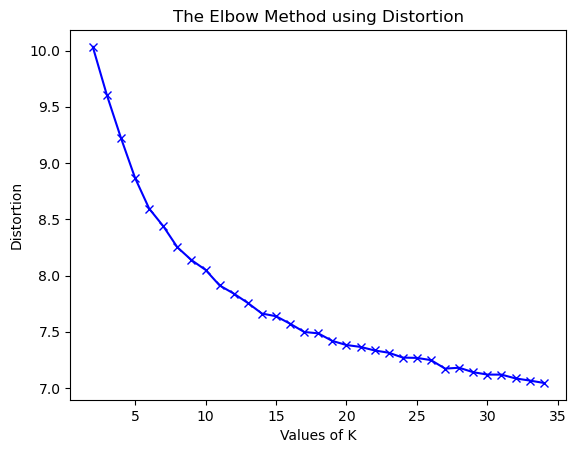

In [11]:
# Считаем силует в зависимости от кол-ва кластеров

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(2, 35)
X = w2v_embeddings.copy()
for k in K:

    kmeanModel = KMeans(n_clusters=k).fit(X)

    distortions.append(sum(np.min(euclidean_distances(X, kmeanModel.cluster_centers_), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(euclidean_distances(X, kmeanModel.cluster_centers_), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_
    
    print('k =', k, 'score =', round(silhouette_score(w2v_embeddings, kmeanModel.predict(w2v_embeddings)), 5))
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [15]:
# Считаем силуэт и сохраняем результат
score = silhouette_score(w2v_embeddings, kmeans.predict(w2v_embeddings))
print('silhouette_score =', score)

pd.DataFrame(kmeans.labels_).to_csv('solution_k_means.csv', header=['cluster'], index=False)

0.18633997


# Вывод
#### Что дало прирост:
1. Ручная очистка текста
2. Обучение на одних только заголовках
3. K-means всегда давал наилучший результат при сдаче на степик как для текстов, так и для изображений
4. Использую другие алгоритмы кластеризации, можно было прикинуть, сколько должно быть кластеров
5. Использование подготовленных эмбеддингов изображений
6. Метод локтя приближенно работает, но не так явно как на примерах в интернете 

#### Что не дало прирост:
1. Обучение векторов на корпусах для fasttext и deeppavlov. Предполагаю, что в таких корпусах не хватает контекста для конкретной задачи.
2. Ни один из методов кластеризации кроме k-means.

#### Что стоило бы еще попробовать:
1. Обучить вектора на какой-нибудь спортивной литературе, которая понимает отличие "силового комплекса" от "тренажерного комплекса" и подобных пар.

#### Лучший результат с текстом:
- Your homogeneity score is: `0.828`
- Your completeness score is: `0.698`

#### Первый попавшийся результат с эмбеддингами изображений:
- Your homogeneity score is: `0.963`
- Your completeness score is: `0.827`

#### Какие остались вопросы:
1. Есть решение задачи до указанной точности используя только тексты?
2. Как были подготовлены эмбеддинги изображений?
3. Каким образом на самом деле было задано на практике кол-во кластеров и чему оно равно?
4. Почему `BisectingKMeans` сильно хуже обычного `KMeans` и в каких случаях это происходит?
5. Почему значение силуэта сильно меньше при построение кластеризации на изображениях, чем на текстах -- `0.186`, против `0.700`, а значения заданных метрик больше у изображений? Правильно ли было стараться увеличить метрику силуэта, чтобы увеличить заданные метрики или стоило бы выбрать какую-то другую метрику? 